## Cleaning, Formatting, and Purifying MTurk Batch Results

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.read_csv('../results/Batch_4386648_batch_results_3-29-21.csv')

In [22]:
results.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.premID_1',
       'Input.mask-type_1', 'Input.hypoID_1', 'Input.premise_1',
       'Input.hypothesis_1', 'Input.orig-prob_1', 'Input.model-label_1',
       'Input.flip-class_1', 'Input.premID_2', 'Input.mask-type_2',
       'Input.hypoID_2', 'Input.premise_2', 'Input.hypothesis_2',
       'Input.orig-prob_2', 'Input.model-label_2', 'Input.flip-class_2',
       'Input.premID_3', 'Input.mask-type_3', 'Input.hypoID_3',
       'Input.premise_3', '

In [23]:
from collections import Counter
Counter(results['WorkerId']).most_common(100)

[('A2EI075XZT9Y2S', 150),
 ('A30HUZHJBOX1LK', 150),
 ('A2C84POENS2UNY', 149),
 ('A3I40B0FATY8VH', 1)]

In [26]:
IO_cols = results.columns[['Input' in col or 'Answer' in col for col in results.columns]]
IO_cols = IO_cols.append(pd.Index(['WorkerId', 'WorkTimeInSeconds']))

df = results[IO_cols]
df

,Input.premID_1,Input.mask-type_1,Input.hypoID_1,Input.premise_1,Input.hypothesis_1,Input.orig-prob_1,Input.model-label_1,Input.flip-class_1,Input.premID_2,Input.mask-type_2,...,Answer.comments,Answer.numanswered,Answer.response_1,Answer.response_2,Answer.response_3,Answer.response_4,Answer.response_5,Answer.useragent,WorkerId,WorkTimeInSeconds
0,11688,content-words,60433,Simmons works most directly with residents of ...,Simmons is most known for his work with mobile...,1.00,entailment,Uncertain-Flip,11688,content-words,...,{},5,neutral,contradiction,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2EI075XZT9Y2S,703
1,11688,content-words,60433,Simmons works most directly with residents of ...,Simmons is most known for his work with mobile...,1.00,entailment,Uncertain-Flip,11688,content-words,...,{},5,neutral,neutral,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,A30HUZHJBOX1LK,998
2,11688,content-words,60433,Simmons works most directly with residents of ...,Simmons is most known for his work with mobile...,1.00,entailment,Uncertain-Flip,11688,content-words,...,{},5,entailment,neutral,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2C84POENS2UNY,1494
3,9515,content-words,48511,As you go through the gate decorated with the ...,You wo going through the gate are going to not...,1.00,entailment,Certain-Flip,9515,content-words,...,{},5,entailment,entailment,contradiction,contradiction,entailment,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2C84POENS2UNY,5061
4,9515,content-words,48511,As you go through the gate decorated with the ...,You wo going through the gate are going to not...,1.00,entailment,Certain-Flip,9515,content-words,...,{},5,entailment,neutral,contradiction,contradiction,neutral,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,A30HUZHJBOX1LK,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,21616,gradient,63549,They can supply equipment and extra insurance ...,They can sell you extra insurance and equipmen...,0.94,neutral,Uncertain-Flip,21616,gradient,...,{},5,neutral,neutral,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2C84POENS2UNY,1138
446,21616,gradient,63549,They can supply equipment and extra insurance ...,They can sell you extra insurance and equipmen...,0.94,neutral,Uncertain-Flip,21616,gradient,...,{},5,neutral,neutral,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2EI075XZT9Y2S,39
447,5728,gradient,16001,Are you really Uncle Hiram's son? she asked wo...,Uncle Hiram had told them that he had no sons.,0.94,neutral,Uncertain-Same,5728,gradient,...,{},5,neutral,neutral,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2EI075XZT9Y2S,35
448,5728,gradient,16001,Are you really Uncle Hiram's son? she asked wo...,Uncle Hiram had told them that he had no sons.,0.94,neutral,Uncertain-Same,5728,gradient,...,{},5,neutral,neutral,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,A30HUZHJBOX1LK,1052


In [27]:
df.shape

(450, 50)

In [28]:
ans_cols = df.columns[['Answer' in col for col in df.columns]]
df.loc[df['Input.hypoID_1'] == 0][ans_cols]

,Answer.comments,Answer.numanswered,Answer.response_1,Answer.response_2,Answer.response_3,Answer.response_4,Answer.response_5,Answer.useragent


In [30]:
# reshape wide into long, premise_1, ... , premise_8 -> premise , ... , premise (len(8))
dt = pd.DataFrame()
for _ , row in df.iterrows():
    for i in range(1,6):
        n_cols = row.index[[str(i) in col for col in row.index]] # getting all prem_1, hypo_1, by integer
        n_cols = n_cols.append(pd.Index(['WorkerId', 'WorkTimeInSeconds']))
        one_row = row.loc[n_cols]
        one_row.index = pd.Index([col[:-2] for col in n_cols]) # removing the '_1', make generic
        dt = dt.append(one_row)

In [31]:
dt

,Answer.response,Input.flip-class,Input.hypoID,Input.hypothesis,Input.mask-type,Input.model-label,Input.orig-prob,Input.premID,Input.premise,WorkTimeInSecon,Worker
0,neutral,Uncertain-Flip,60433.0,Simmons is most known for his work with mobile...,content-words,entailment,1.00,11688.0,Simmons works most directly with residents of ...,703.0,A2EI075XZT9Y2S
0,contradiction,Uncertain-Flip,60441.0,Simmons has never talked about his work with m...,content-words,contradiction,1.00,11688.0,Simmons works most directly with residents of ...,703.0,A2EI075XZT9Y2S
0,neutral,Certain-Same,60433.0,Simmons is enthusiastic about his work with mo...,original,neutral,1.00,11688.0,Simmons works most directly with residents of ...,703.0,A2EI075XZT9Y2S
0,neutral,Uncertain-Same,60427.0,Simmons spoke about his work with mobile park ...,content-words,neutral,1.00,11688.0,Simmons works most directly with residents of ...,703.0,A2EI075XZT9Y2S
0,neutral,Certain-Same,60438.0,Simmons is enthusiastic about working directly...,content-words,neutral,1.00,11688.0,Simmons works most directly with residents of ...,703.0,A2EI075XZT9Y2S
...,...,...,...,...,...,...,...,...,...,...,...
449,neutral,Uncertain-Same,16001.0,Uncle Hiram had told them that he had no sons.,gradient,neutral,0.94,5728.0,Are you really Uncle Hiram's son? she asked wo...,753.0,A2C84POENS2UNY
449,neutral,Uncertain-Flip,16007.0,Uncle Hiram had informed them that he had no s...,gradient,contradiction,0.94,5728.0,Are you really Uncle Hiram's son? she asked wo...,753.0,A2C84POENS2UNY
449,neutral,Certain-Same,16001.0,Uncle Hiram had always told them that he had n...,original,neutral,0.94,5728.0,Are you really Uncle Hiram's son? she asked wo...,753.0,A2C84POENS2UNY
449,neutral,Uncertain-Same,16004.0,Uncle Hiram always told them that he had no sons.,gradient,neutral,0.94,5728.0,Are you really Uncle Hiram's son? she asked wo...,753.0,A2C84POENS2UNY


In [32]:
# rename columns and sort
s_df = dt.sort_values(by = ['Input.premID', 'Input.hypoID', 'Input.mask-type'])
new_cols = s_df.columns.values

# add in worker column 
renamed_cols = [col.split('.')[1] for col in new_cols[:-1]]
renamed_cols.append('Worker')
renamed_cols.append('WorkTimeInSeconds')
s_df.columns = renamed_cols

IndexError: list index out of range

1137.9244444444444

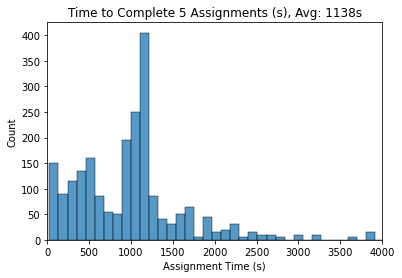

In [41]:
sns.histplot(s_df['WorkTimeInSecon'])
plt.xlim([0,4000])
plt.xlabel('Assignment Time (s)')
plt.title('Time to Complete 5 Assignments (s), Avg: 1138s')
plt.savefig('../graphs/AssignmentTime.png', dpi=200)

In [11]:
s_df.groupby('premID').count().sort_values(by='response')

,response,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premise,Worker
premID,,,,,,,,,
209.0,15,15,15,15,15,15,15,15,15
16317.0,15,15,15,15,15,15,15,15,15
17012.0,15,15,15,15,15,15,15,15,15
17188.0,15,15,15,15,15,15,15,15,15
17454.0,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...
8646.0,15,15,15,15,15,15,15,15,15
8700.0,15,15,15,15,15,15,15,15,15
7978.0,15,15,15,15,15,15,15,15,15


### remove by premise where there is incomplete data

In [41]:
missing_prems = []

for prem_id in s_df['premID'].unique():
    if len(s_df.loc[s_df['premID'] == prem_id]) < 12:
        missing_prems.append(prem_id)
        
clean_df = s_df[~s_df['premID'].isin(missing_prems)]

In [42]:
s_df['premID'].unique().shape

(148,)

In [43]:
clean_df['premID'].unique().shape

(148,)

In [44]:
clean_df.shape

(2250, 10)

## remove annotators that are noisy by correlation

In [45]:
clean_df

,response,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premID,premise,Worker
69,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2EI075XZT9Y2S
70,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2C84POENS2UNY
71,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A30HUZHJBOX1LK
69,contradiction,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2EI075XZT9Y2S
70,contradiction,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2C84POENS2UNY
...,...,...,...,...,...,...,...,...,...,...
235,entailment,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,A2C84POENS2UNY
236,entailment,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,A30HUZHJBOX1LK
234,entailment,Uncertain-Flip,53879.0,Employees at higher levels of experience are i...,data-slices,entailment,0.99,99411.0,Employees at all levels of high-performing org...,A2EI075XZT9Y2S
235,entailment,Uncertain-Flip,53879.0,Employees at higher levels of experience are i...,data-slices,entailment,0.99,99411.0,Employees at all levels of high-performing org...,A2C84POENS2UNY


### get gold label where annotators agree >2 

In [46]:
len(clean_df['hypoID'].unique())

597

In [47]:
from collections import Counter

agrees = []
cum_df = pd.DataFrame()
for hypo_id in clean_df['hypoID'].unique():
    ex = clean_df.loc[clean_df['hypoID'] == hypo_id]
    agrees.append(len(Counter(ex.response)))
    if len(Counter(ex.response)) < 3:
        agree = ex.copy().iloc[0]
        agree.response = ex['response'].value_counts().idxmax()
        cum_df = cum_df.append(agree)

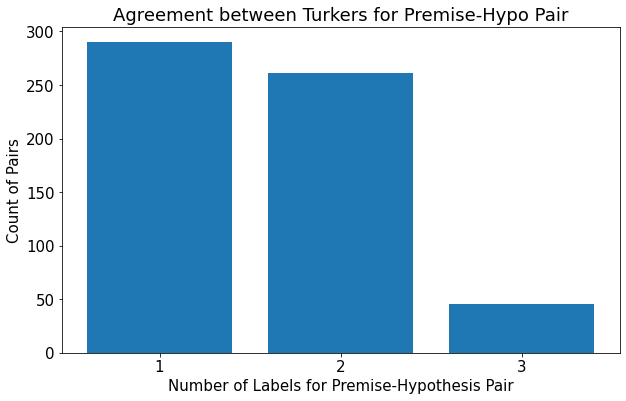

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

plt.rcParams.update({'font.size': 15})
labels, counts = np.unique(agrees, return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Number of Labels for Premise-Hypothesis Pair')
plt.ylabel('Count of Pairs')
plt.title('Agreement between Turkers for Premise-Hypo Pair')
plt.savefig('../graphs/Turker_Agreement.png', dpi = 200)
plt.show()

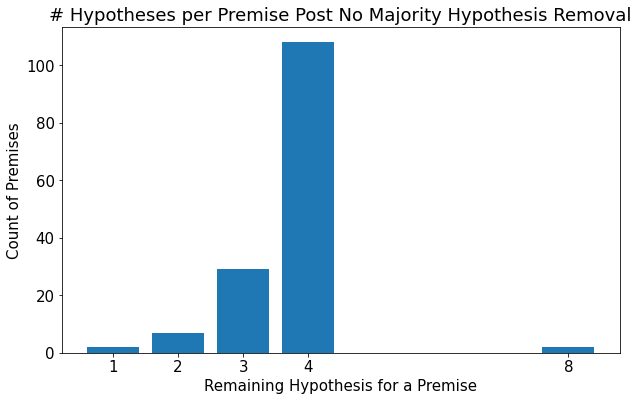

In [49]:
fig, ax = plt.subplots(figsize=(10,6))

plt.rcParams.update({'font.size': 15})
labels, counts = np.unique(cum_df.value_counts('premID'), return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Remaining Hypothesis for a Premise')
plt.ylabel('Count of Premises')
plt.title('# Hypotheses per Premise Post No Majority Hypothesis Removal')
plt.savefig('../graphs/Premises_Left.png', dpi = 200)
plt.show()

In [50]:
cum_df

,Worker,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premID,premise,response
69,A2EI075XZT9Y2S,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,entailment
69,A2EI075XZT9Y2S,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,contradiction
69,A2EI075XZT9Y2S,Uncertain-Flip,935.0,The amount of work that can be turned over in ...,content-words,neutral,0.99,209.0,(Mitchell 1999) The amount of work that can be...,neutral
69,A2EI075XZT9Y2S,Uncertain-Same,938.0,The amount of money that can be turned over in...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,neutral
120,A2C84POENS2UNY,Certain-Flip,2408.0,The history of the nation has no important poi...,content-words,contradiction,0.98,445.0,The Valley of the Boyne has played an importan...,contradiction
...,...,...,...,...,...,...,...,...,...,...
219,A2C84POENS2UNY,Uncertain-Same,50950.0,It will take a very long period for the GAO to...,data-slices,contradiction,0.99,93689.0,GAO will provide electronic copies of reports ...,neutral
234,A2EI075XZT9Y2S,Uncertain-Same,53875.0,Employees at higher levels of experience parti...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,entailment
234,A2EI075XZT9Y2S,Certain-Flip,53876.0,Employees at higher levels of experience parti...,data-slices,contradiction,0.99,99411.0,Employees at all levels of high-performing org...,contradiction
234,A2EI075XZT9Y2S,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,entailment


### remove premises where not all hypothesizes had majority agreement

In [51]:
# remove by premise where there is incomplete data
missing_prems = []

for prem_id in cum_df['premID'].unique():
    if len(cum_df.loc[cum_df['premID'] == prem_id]) < 4:
        missing_prems.append(prem_id)
        
pure_df = cum_df[~cum_df['premID'].isin(missing_prems)]

In [52]:
pure_df['premID'].unique().shape

(110,)

In [53]:
pure_df

,Worker,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premID,premise,response
69,A2EI075XZT9Y2S,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,entailment
69,A2EI075XZT9Y2S,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,contradiction
69,A2EI075XZT9Y2S,Uncertain-Flip,935.0,The amount of work that can be turned over in ...,content-words,neutral,0.99,209.0,(Mitchell 1999) The amount of work that can be...,neutral
69,A2EI075XZT9Y2S,Uncertain-Same,938.0,The amount of money that can be turned over in...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,neutral
357,A30HUZHJBOX1LK,Uncertain-Same,1770.0,The Maroon people tenderized and cooked their ...,gradient,entailment,0.99,607.0,The jerk marinating technique was first develo...,neutral
...,...,...,...,...,...,...,...,...,...,...
219,A2C84POENS2UNY,Uncertain-Same,50950.0,It will take a very long period for the GAO to...,data-slices,contradiction,0.99,93689.0,GAO will provide electronic copies of reports ...,neutral
234,A2EI075XZT9Y2S,Uncertain-Same,53875.0,Employees at higher levels of experience parti...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,entailment
234,A2EI075XZT9Y2S,Certain-Flip,53876.0,Employees at higher levels of experience parti...,data-slices,contradiction,0.99,99411.0,Employees at all levels of high-performing org...,contradiction
234,A2EI075XZT9Y2S,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,entailment


In [25]:
reorg_cols = ['premID', 'premise', 'mask-type', 'hypoID', 'hypothesis', 'response', 'Worker']
pure_df = pure_df.reindex(columns=reorg_cols)

In [26]:
pure_df

,premID,premise,mask-type,hypoID,hypothesis,response,Worker
69,209.0,(Mitchell 1999) The amount of work that can be...,content-words,928.0,The amount of work that can be turned over in ...,entailment,A2EI075XZT9Y2S
69,209.0,(Mitchell 1999) The amount of work that can be...,content-words,934.0,No amount of work that can be turned over in t...,contradiction,A2EI075XZT9Y2S
69,209.0,(Mitchell 1999) The amount of work that can be...,content-words,935.0,The amount of work that can be turned over in ...,neutral,A2EI075XZT9Y2S
69,209.0,(Mitchell 1999) The amount of work that can be...,content-words,938.0,The amount of money that can be turned over in...,neutral,A2EI075XZT9Y2S
357,607.0,The jerk marinating technique was first develo...,gradient,1770.0,The Maroon people tenderized and cooked their ...,neutral,A30HUZHJBOX1LK
...,...,...,...,...,...,...,...
219,93689.0,GAO will provide electronic copies of reports ...,data-slices,50950.0,It will take a very long period for the GAO to...,neutral,A2C84POENS2UNY
234,99411.0,Employees at all levels of high-performing org...,data-slices,53875.0,Employees at higher levels of experience parti...,entailment,A2EI075XZT9Y2S
234,99411.0,Employees at all levels of high-performing org...,data-slices,53876.0,Employees at higher levels of experience parti...,contradiction,A2EI075XZT9Y2S
234,99411.0,Employees at all levels of high-performing org...,data-slices,53877.0,Employees at higher levels of experience have ...,entailment,A2EI075XZT9Y2S


In [27]:
pure_df.to_csv('../results/pure_batch_results_3-3-21.csv')

## Merging with Original Generation Data

In [28]:
ls ../mturk/3-20-21/

Batch_4386648_batch_results_3-29-21.csv
Pilot_Test_Batch_150_3-28-21.csv
Pilot_Test_Master_150_3-28-21.csv
Qualification_Batch_3-24-21.csv
generate_labels_for_qualification_3-22-21.csv
gold_labels_for_qualification_3-22-21.csv
qualification_HITS_3-22-21.csv


In [29]:
#m_df = pd.read_csv('../results/pure_batch_results_3-3-21.csv')
gen_df = pd.read_csv('../mturk/3-20-21/Pilot_Test_Master_150_3-28-21.csv')

In [30]:
gen_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,line-num,pred-model,fill-model,tokens-masked,prepend-model,sampling-strategy,...,orig-label,new-label,orig-label-prob,same-label-prob,new-label-prob,label-changed,same-label-prob-diff,flip-class,weights,Unamed: 0.1.1
0,7026,59739,60433,60433,11688,RoBERTa-MNLI,fine-tuned,content-words,gold-label,beam,...,neutral,entailment,1.00,0.35,0.65,True,0.65,Uncertain-Flip,0.9,NaN
1,3028,59733,60427,60427,11688,RoBERTa-MNLI,fine-tuned,content-words,gold-label,beam,...,neutral,neutral,1.00,0.66,0.66,False,0.34,Uncertain-Same,0.9,NaN
2,37495,59744,60438,60438,11688,RoBERTa-MNLI,fine-tuned,content-words,gold-label,beam,...,neutral,neutral,1.00,1.00,1.00,False,0.00,Certain-Same,0.1,NaN
3,7016,59747,60441,60441,11688,RoBERTa-MNLI,fine-tuned,content-words,gold-label,beam,...,neutral,contradiction,1.00,0.23,0.77,True,0.77,Uncertain-Flip,0.9,NaN
4,7026,59739,60433,60433,11688,RoBERTa-MNLI,fine-tuned,original,gold-label,beam,...,neutral,neutral,1.00,1.00,1.00,True,0.65,Certain-Same,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1907,15676,16001,16001,5728,RoBERTa-MNLI,fine-tuned,gradient,gold-label,beam,...,neutral,neutral,0.94,0.79,0.79,False,0.15,Uncertain-Same,0.9,NaN
746,1307,15679,16004,16004,5728,RoBERTa-MNLI,fine-tuned,gradient,gold-label,beam,...,neutral,neutral,0.94,0.56,0.56,False,0.38,Uncertain-Same,0.9,NaN
747,61732,15677,16002,16002,5728,RoBERTa-MNLI,fine-tuned,gradient,gold-label,beam,...,neutral,contradiction,0.94,0.19,0.80,True,0.75,Certain-Flip,0.2,NaN
748,5781,15682,16007,16007,5728,RoBERTa-MNLI,fine-tuned,gradient,gold-label,beam,...,neutral,contradiction,0.94,0.43,0.57,True,0.51,Uncertain-Flip,0.9,NaN


In [54]:
clean_df

,response,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premID,premise,Worker
69,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2EI075XZT9Y2S
70,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2C84POENS2UNY
71,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A30HUZHJBOX1LK
69,contradiction,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2EI075XZT9Y2S
70,contradiction,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2C84POENS2UNY
...,...,...,...,...,...,...,...,...,...,...
235,entailment,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,A2C84POENS2UNY
236,entailment,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,A30HUZHJBOX1LK
234,entailment,Uncertain-Flip,53879.0,Employees at higher levels of experience are i...,data-slices,entailment,0.99,99411.0,Employees at all levels of high-performing org...,A2EI075XZT9Y2S
235,entailment,Uncertain-Flip,53879.0,Employees at higher levels of experience are i...,data-slices,entailment,0.99,99411.0,Employees at all levels of high-performing org...,A2C84POENS2UNY


In [57]:
cum_df

,Worker,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premID,premise,response
69,A2EI075XZT9Y2S,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,entailment
69,A2EI075XZT9Y2S,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,contradiction
69,A2EI075XZT9Y2S,Uncertain-Flip,935.0,The amount of work that can be turned over in ...,content-words,neutral,0.99,209.0,(Mitchell 1999) The amount of work that can be...,neutral
69,A2EI075XZT9Y2S,Uncertain-Same,938.0,The amount of money that can be turned over in...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,neutral
120,A2C84POENS2UNY,Certain-Flip,2408.0,The history of the nation has no important poi...,content-words,contradiction,0.98,445.0,The Valley of the Boyne has played an importan...,contradiction
...,...,...,...,...,...,...,...,...,...,...
219,A2C84POENS2UNY,Uncertain-Same,50950.0,It will take a very long period for the GAO to...,data-slices,contradiction,0.99,93689.0,GAO will provide electronic copies of reports ...,neutral
234,A2EI075XZT9Y2S,Uncertain-Same,53875.0,Employees at higher levels of experience parti...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,entailment
234,A2EI075XZT9Y2S,Certain-Flip,53876.0,Employees at higher levels of experience parti...,data-slices,contradiction,0.99,99411.0,Employees at all levels of high-performing org...,contradiction
234,A2EI075XZT9Y2S,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,entailment


In [62]:
Counter(clean_df['mask-type'])
clean_df

,response,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premID,premise,Worker,model_wrong
69,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2EI075XZT9Y2S,False
70,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2C84POENS2UNY,False
71,entailment,Certain-Same,928.0,The amount of work that can be turned over in ...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A30HUZHJBOX1LK,False
69,contradiction,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2EI075XZT9Y2S,True
70,contradiction,Uncertain-Same,934.0,No amount of work that can be turned over in t...,content-words,entailment,0.99,209.0,(Mitchell 1999) The amount of work that can be...,A2C84POENS2UNY,True
...,...,...,...,...,...,...,...,...,...,...,...
235,entailment,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,A2C84POENS2UNY,True
236,entailment,Uncertain-Same,53877.0,Employees at higher levels of experience have ...,data-slices,neutral,0.99,99411.0,Employees at all levels of high-performing org...,A30HUZHJBOX1LK,True
234,entailment,Uncertain-Flip,53879.0,Employees at higher levels of experience are i...,data-slices,entailment,0.99,99411.0,Employees at all levels of high-performing org...,A2EI075XZT9Y2S,False
235,entailment,Uncertain-Flip,53879.0,Employees at higher levels of experience are i...,data-slices,entailment,0.99,99411.0,Employees at all levels of high-performing org...,A2C84POENS2UNY,False


In [58]:
cum_df['model_wrong'] = cum_df.response != cum_df['model-label']
cum_df.groupby(['mask-type', 'flip-class']).agg({'model_wrong': ['mean', 'count', 'sum']}).T

mask-type         content-words                                             \
flip-class         Certain-Flip Certain-Same Uncertain-Flip Uncertain-Same   
model_wrong mean       0.272727       0.1875        0.58209        0.52381   
            count     22.000000      32.0000       67.00000       63.00000   
            sum        6.000000       6.0000       39.00000       33.00000   

mask-type          data-slices                                             \
flip-class        Certain-Flip Certain-Same Uncertain-Flip Uncertain-Same   
model_wrong mean      0.242424     0.307692       0.515152       0.446429   
            count    33.000000    26.000000      66.000000      56.000000   
            sum       8.000000     8.000000      34.000000      25.000000   

mask-type             gradient                                             
flip-class        Certain-Flip Certain-Same Uncertain-Flip Uncertain-Same  
model_wrong mean      0.242424          0.2       0.525424       0.478261  
            count    33.000000         25.0      59.000000      69.000000  
            sum       8.000000          5.0      31.000000      33.000000

In [32]:
big_df = pd.merge(m_df, gen_df, left_on = 'hypoID', right_on = 'Unnamed: 0')
big_df

,Unnamed: 0_x,premID,premise_x,mask-type,hypoID,hypothesis_x,response,Worker,Unnamed: 0_y,Unnamed: 0.1,...,orig-label,new-label,orig-label-prob,same-label-prob,new-label-prob,label-changed,same-label-prob-diff,flip-class,weights,Unamed: 0.1.1
0,207,28909.0,Poblete claims that the reports will be posted...,data-slices,15667.0,Poblete claims that the reports were lost due ...,contradiction,A2EI075XZT9Y2S,15667,8036,...,contradiction,contradiction,0.97,0.98,0.98,False,0.01,Certain-Same,0.1,NaN


## Remove annotators that are noisy (don't have correct labels on original)

In [33]:
big_df['model_wrong'] = big_df.response != big_df['new-label']

In [34]:
bad_workers = []
for worker in big_df['Worker'].unique():
    cut = big_df.loc[big_df['Worker'] == worker]
    cut = cut.loc[cut['mask-type'] == 'original']
    if sum(cut['model_wrong']) > 0:
        bad_workers.append(worker)

print(bad_workers)

[]


In [35]:
big_df = big_df[~big_df['Worker'].isin(bad_workers)]

In [36]:
big_df.groupby(['mask-type', 'flip-class']).agg({'model_wrong': ['mean', 'count', 'sum']})

model_wrong          
                                mean count sum
mask-type   flip-class                        
data-slices Certain-Same       False     1   0

## Trying on Less Pure Splits of the Data

In [37]:
big_bad_df = pd.merge(cum_df, gen_df, left_on = 'hypoID', right_on = 'Unnamed: 0')

In [38]:
big_bad_df['model_wrong'] = big_bad_df.response != big_bad_df['new-label']

bad_workers = []
for worker in big_bad_df['Worker'].unique():
    cut = big_bad_df.loc[big_bad_df['Worker'] == worker]
    cut = cut.loc[cut['mask-type'] == 'original']
    if sum(cut['model_wrong']) > 0:
        bad_workers.append(worker)

print(bad_workers)

bad_df_no_workers = big_bad_df[~big_bad_df['Worker'].isin(bad_workers)]

[]


In [39]:
# get a list of original examples that are majority labeled wrong. 

orig_wrongs = big_bad_df.loc[big_bad_df['mask-type'] == 'original']
orig_wrongs.loc[orig_wrongs['model_wrong'] == 1].to_csv('original_wrongs_3-3-21.csv')

In [40]:
big_bad_df.groupby(['mask-type', 'flip-class']).agg({'model_wrong': ['mean', 'count', 'sum']}).T

KeyError: 'flip-class'

In [ ]:
big_horrible_df = pd.merge(s_df, gen_df, left_on = 'hypoID', right_on = 'Unnamed: 0')

In [ ]:
big_horrible_df['model_wrong'] = big_horrible_df.response != big_horrible_df['new-label']
big_horrible_df.groupby(['mask-type', 'flip-class']).agg({'model_wrong': ['mean', 'count', 'sum']}).T
